In [2]:
import numpy as np
import scipy.io as sio
import glob
from sklearn import linear_model
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from itertools import cycle
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from scipy.stats import sem
from scipy import stats
from scipy import ndimage
import pystan
from matplotlib import cm

%matplotlib inline

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])


import warnings
warnings.simplefilter("ignore")


import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])


import sys
sys.path.append('C:\\Users\\adamimos\\Documents\\GitHub\\ASAC\\python')
from import_rat_data import *
from behavior_analysis import *
#from decoder_functions import *

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import cv2

In [3]:
#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses8Dir\\adam0_20190731.pickle",'rb')
#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\Dots8dir\\Anton1_20190302.pickle",'rb')
#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\Gratings8Dir\\Terry20190216.pickle",'rb')
#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\Gratings8Dir\\Anton1_20190414.pickle",'rb')
#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\Gratings8Dir\\Terry20190201.pickle",'rb')
#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MC8Dir\\Adam0_20190508.pickle",'rb')
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses45\\adam0_20190823.pickle",'rb')
data = pickle.load(file)
file.close()   

In [3]:

file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses45\\centerhold_20190808.pickle",'rb')
data = pickle.load(file)
file.close()

In [31]:
traces = data['completed_trials_data']['traces_stim_aligned']
directions = data['completed_trials_data']['stim_dir']
noise = data['completed_trials_data']['noise']
dirs = np.unique(directions)
for i in range(len(noise)):
    if directions[i]==dirs[0]:
        noise[i]=-noise[i]
directions = noise

In [32]:
directions

array([-0.25, -0.45,  0.25,  0.1 ,  0.25,  0.25,  0.25, -0.25,  0.25,
        0.25, -0.45,  0.1 , -0.45,  0.45, -0.45,  1.  ,  0.45,  1.  ,
       -0.1 ,  0.25,  0.45,  0.25,  0.25, -0.1 ,  0.25,  0.7 , -0.7 ,
        0.1 , -0.1 ,  0.25, -0.25, -0.25, -0.45,  0.7 , -0.45, -0.25,
       -0.45,  0.7 , -0.25,  0.25,  1.  , -0.25,  0.1 ,  0.45,  0.25,
       -0.25,  0.45,  0.1 ,  0.7 ,  0.25,  0.1 ,  0.25, -0.1 ,  0.1 ,
        0.45, -0.45, -0.45,  0.45, -1.  ,  0.45,  0.25,  0.7 , -0.7 ,
       -1.  ,  0.7 ,  0.1 , -0.7 ,  0.45,  0.1 , -0.1 ,  0.7 ,  0.1 ,
        0.1 ,  0.1 ,  0.25, -0.45,  0.45,  1.  , -0.25, -0.45, -0.25,
       -0.1 , -0.1 , -0.45, -0.1 , -0.25,  0.25, -0.45, -0.25, -0.25,
        0.1 , -0.45, -0.1 , -0.45,  1.  , -0.45, -0.7 , -0.7 , -0.25,
       -0.45,  0.25, -0.1 , -0.7 , -0.7 , -0.1 ,  0.25, -0.45, -0.25,
        1.  , -0.1 , -0.7 , -0.7 , -0.25, -0.1 , -0.1 , -0.1 , -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.7 , -1.  , -0.25,  0.1 , -0.25,
       -0.1 ,  0.45,

In [33]:
independent_variable= np.array(directions)
data_to_avg = np.array(traces)
av_traces = []
for x in np.unique(independent_variable):
    av_traces.append(np.mean(data_to_avg[np.where(independent_variable==x)[0],:,:],axis=0))
av_traces = np.array(av_traces)


In [34]:
import matplotlib.pylab as pl

def plot_av_dir_traces(n):
    #fig = plt.figure(figsize=(20,7))
    colors = pl.cm.RdBu(np.linspace(0,1,av_traces.shape[0]))
    #plt.subplot(1,2,1)
    for x in range(av_traces.shape[0]):
        plt.plot(np.squeeze(av_traces[x,n,:]),color = colors[x])  
    plt.plot([35,35],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.plot([40,40],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.plot([47,47],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.xticks([35,43], ['poke','stim'])
    plt.xlim([20,60])

In [35]:
interact(plot_av_dir_traces,n=widgets.IntSlider(min=0,max=data_to_avg.shape[1]-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=244), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_av_dir_traces(n)>

In [36]:
def plot_rasters(n):
    fig = plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    plt.imshow(data_to_avg[np.argsort(independent_variable),n,:],aspect='auto')
    deltas = np.where(np.diff(independent_variable[np.argsort(independent_variable)]))[0]
    for i in range(len(deltas)):
        plt.plot([20,80],[deltas[i],deltas[i]],'w--',alpha=0.4)
        #plt.arrow(30,deltas[i]-25,5*np.cos(i*np.pi/4),-5*np.sin(i*np.pi/4),color='r')
    plt.xlim([20,80])
    plt.ylim([0,len(independent_variable)])
    plt.plot([40,40],[0,len(independent_variable)],'w--',alpha=0.4)
    plt.plot([47,47],[0,len(independent_variable)],'w--',alpha=0.4)

In [37]:
interact(plot_rasters,n=widgets.IntSlider(min=0,max=av_traces.shape[1],step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=245), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_rasters(n)>

In [10]:


def plot_activity(n):
    traces = data['completed_trials_data']['traces_stim_aligned']
    directions = data['completed_trials_data']['stim_dir']
    independent_variable= np.array(directions)
    data_to_avg = np.array(traces)
    ind_vars = np.unique(independent_variable)
    n_ind_vars = len(ind_vars)
    fig = plt.figure(figsize=(10,10))
    mm = np.max(np.max(data_to_avg[:,n,:]))
    for i in range(n_ind_vars):
        plt.subplot(n_ind_vars,2,i+1)
        to_plot = data_to_avg[np.where(independent_variable==ind_vars[i])[0],n,:].T
        plt.plot(to_plot,color='k',alpha=0.1);

        plt.xlim([20,80])
        plt.plot([40,40],[0,mm],'k--',alpha=0.4)
        plt.plot([47,47],[0,mm],'k--',alpha=0.4)
    k=2
    traces = data['completed_trials_data']['traces_resp_aligned']
    directions = data['completed_trials_data']['response_side']        
    independent_variable= np.array(directions)
    data_to_avg = np.array(traces)
    ind_vars = np.unique(independent_variable)
    n_ind_vars = len(ind_vars)
    mm = np.max(np.max(data_to_avg[:,n,:]))
    for i in range(n_ind_vars):
        plt.subplot(n_ind_vars,2,i+1+k)
        to_plot = data_to_avg[np.where(independent_variable==ind_vars[i])[0],n,:].T
        plt.plot(to_plot,color='r',alpha=0.1);

        plt.xlim([40,100])
        plt.plot([60,60],[0,mm],'k--',alpha=0.4)


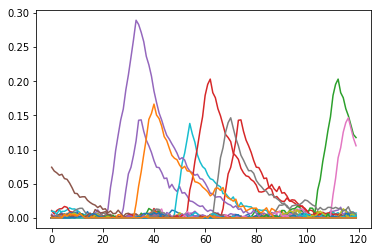

In [11]:
ind_vars = np.unique(independent_variable)
n_ind_vars = len(ind_vars)
plt.plot(data_to_avg[np.where(independent_variable==ind_vars[0])[0],5,:].T);

In [12]:
interact(plot_activity,n=widgets.IntSlider(min=0,max=av_traces.shape[1],step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=245), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_activity(n)>

In [13]:
traces = data['completed_trials_data']['traces_stim_aligned']
directions = data['completed_trials_data']['response_side']


In [14]:
independent_variable= directions
data_to_avg = traces
av_traces = []
for x in np.unique(independent_variable):
    av_traces.append(np.mean(data_to_avg[np.where(independent_variable==x)[0],:,:],axis=0))
av_traces = np.array(av_traces)


In [15]:
import matplotlib.pylab as pl

def plot_av_dir_traces(n):
    #fig = plt.figure(figsize=(20,7))
    colors = pl.cm.RdBu(np.linspace(0,1,av_traces.shape[0]))
    #plt.subplot(1,2,1)
    for x in range(av_traces.shape[0]):
        plt.plot(np.squeeze(av_traces[x,n,:]),color = colors[x])  
    plt.plot([35,35],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.plot([40,40],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.plot([47,47],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.xticks([35,43], ['poke','stim'])
    plt.xlim([20,60])

In [16]:
interact(plot_av_dir_traces,n=widgets.IntSlider(min=0,max=data_to_avg.shape[1]-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=244), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_av_dir_traces(n)>

In [17]:
def plot_rasters(n):
    fig = plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    plt.imshow(data_to_avg[np.argsort(independent_variable),n,:],aspect='auto')
    #deltas = np.where(np.diff(independent_variable[np.argsort(independent_variable)]))[0]
    #for i in range(len(deltas)):
    #    plt.plot([20,80],[deltas[i],deltas[i]],'w--',alpha=0.4)
        #plt.arrow(30,deltas[i]-25,5*np.cos(i*np.pi/4),-5*np.sin(i*np.pi/4),color='r')
    plt.xlim([20,80])
    plt.ylim([0,len(independent_variable)])
    plt.plot([40,40],[0,len(independent_variable)],'w--',alpha=0.4)
    plt.plot([47,47],[0,len(independent_variable)],'w--',alpha=0.4)

In [18]:
interact(plot_rasters,n=widgets.IntSlider(min=0,max=av_traces.shape[1],step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=245), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_rasters(n)>

array([218, 179, 178,  76,  75, 177,  72, 311, 310, 130,  68, 161, 308,
       133, 230, 231, 270, 172, 301, 236,  56, 110,  54, 174, 217, 125,
       180, 113, 188, 193, 332, 195, 196, 197, 117, 100, 379,  97, 202,
       203, 204, 322, 184, 207, 208, 210, 211, 212,  85, 181,  53,  52,
        55,  50, 144, 290, 163,  26, 237, 346, 153, 149, 164, 455, 151,
       152, 282, 281, 280, 279,  14, 461,  12,  30,  11,   6, 155, 300,
       239, 435, 240, 268,  43, 274, 139,  32,  41, 296,   4, 362, 361,
       443, 360,  34, 248,  40, 462, 333, 347, 345, 335, 336, 344, 343,
       342, 337, 338, 339, 341, 340, 334, 331,   0, 329, 298, 297, 295,
       294, 293, 292, 291, 289, 288, 287, 286, 285, 284, 283, 278, 277,
       276, 275, 273, 299, 302, 303, 304, 328, 327, 326, 325, 324, 323,
       321, 320, 319, 330, 318, 316, 315, 314, 313, 312, 309, 307, 306,
       305, 317, 348, 366, 350, 437, 436, 434, 433, 432, 431, 430, 429,
       428, 427, 426, 438, 425, 423, 422, 421, 420, 419, 418, 41

In [19]:
def plot_many_rasters(N):
    plt.figure(figsize=(20,10))

    
    
    
    
    
    
    plt.subplot(231)
    plt.imshow(interp_traces[N, data.sort_values(by=['stim_right_lag1'],kind='mergesort').index.tolist(),:],aspect=0.1,cmap='PuRd')
    plt.plot([5,5],[0,250],'--k')
    plt.plot([10,10],[0,250],'--k')
    plt.plot([20,20],[0,250],'--k')
    plt.plot([25,25],[0,250],'--k')
    _dum_yticks = data.stim_right_lag1.value_counts().sort_index().cumsum().tolist()
    for x in _dum_yticks[:-1]:
        plt.plot([0,34],[x,x],'--k',linewidth=0.5)
    plt.yticks([])
    plt.gca().set_yticklabels(''); _dum_yticks.insert(0,0)
    plt.gca().set_yticks(np.ediff1d(_dum_yticks)/2 + _dum_yticks[:-1],minor=True)
    plt.gca().set_yticklabels(['L','R'],minor=True)
    plt.xticks([]); plt.gca().set_xticks([7.5,15,30]); plt.gca().set_xticklabels(['poke','stimulus','response'])
    plt.ylabel('Trial')
    plt.title('Previous Stimulus')

    plt.subplot(232)
    plt.imshow(interp_traces[N, data.sort_values(by=['coherence'],kind='mergesort').index.tolist(),:],aspect=0.1,cmap='PuRd')
    plt.plot([5,5],[0,250],'--k',linewidth=0.5)
    plt.plot([10,10],[0,250],'--k',linewidth=0.5)
    plt.plot([20,20],[0,250],'--k',linewidth=0.5)
    plt.plot([25,25],[0,250],'--k',linewidth=0.5)
    _dum_yticks = data.coherence.value_counts().sort_index().cumsum().tolist()
    for x in _dum_yticks[:-1]:
        plt.plot([0,34],[x,x],'--k',linewidth=0.5)
    plt.yticks([])
    plt.gca().set_yticklabels(''); _dum_yticks.insert(0,0)
    plt.gca().set_yticks(np.ediff1d(_dum_yticks)/2 + _dum_yticks[:-1],minor=True)
    plt.gca().set_yticklabels([str(x) for x in np.sort(data.coherence.unique()).tolist()],minor=True)
    plt.xticks([])
    plt.gca().set_xticks([7.5,15,30])
    plt.gca().set_xticklabels(['poke','stimulus','response'])
    plt.title('Coherence')

    plt.subplot(233)
    plt.imshow(interp_traces[N, data.sort_values(by=['response_right'],kind='mergesort').index.tolist(),:],aspect=0.1,cmap='PuRd')
    plt.plot([5,5],[0,250],'--k')
    plt.plot([10,10],[0,250],'--k')
    plt.plot([20,20],[0,250],'--k')
    plt.plot([25,25],[0,250],'--k')
    _dum_yticks = data.response_right.value_counts().sort_index().cumsum().tolist()
    for x in _dum_yticks[:-1]:
        plt.plot([0,34],[x,x],'--k',linewidth=0.5)
    plt.yticks([])
    plt.gca().set_yticklabels(''); _dum_yticks.insert(0,0)
    plt.gca().set_yticks(np.ediff1d(_dum_yticks)/2 + _dum_yticks[:-1],minor=True)
    plt.gca().set_yticklabels(['L','R'],minor=True)
    plt.xticks([]); plt.gca().set_xticks([7.5,15,30]); plt.gca().set_xticklabels(['poke','stimulus','response'])
    plt.title('Response')

    plt.subplot(234)
    plt.imshow(interp_traces[N, :,:],aspect=0.1,cmap='PuRd')
    plt.plot([5,5],[0,250],'--k')
    plt.plot([10,10],[0,250],'--k')
    plt.plot([20,20],[0,250],'--k')
    plt.plot([25,25],[0,250],'--k')
    plt.xticks([]); plt.gca().set_xticks([7.5,15,30]); plt.gca().set_xticklabels(['poke','stimulus','response'])
    plt.title('Trials')
    xl,yl=plt.xlim(),plt.ylim()
    plt.plot([5,5],[-1,5],'--k')
    plt.plot([10,10],[-1,5],'--k')
    plt.plot([20,20],[-1,5],'--k')
    plt.plot([25,25],[-1,5],'--k')
    plt.xlim(xl),plt.ylim(yl);
    plt.xlabel('Trial Time')
    plt.ylabel('Trial')


    plt.subplot(235)
    plt.imshow(interp_traces[N, data.sort_values(by=['response_right', 'was_correct'],kind='mergesort').index.tolist(),:],aspect=0.1,cmap='PuRd')
    _dum_yticks = data.groupby(['response_right', 'was_correct'])['index'].count().sort_index().cumsum().tolist()
    for x in _dum_yticks[:-1]:
        plt.plot([0,34],[x,x],'--k',linewidth=0.5)
    plt.yticks([])
    plt.gca().set_yticklabels(''); _dum_yticks.insert(0,0)
    plt.gca().set_yticks(np.ediff1d(_dum_yticks)/2 + _dum_yticks[:-1],minor=True)
    plt.gca().set_yticklabels(    ['L0','L1','R0','R1']
                              ,minor=True)
    plt.xticks([])
    plt.gca().set_xticks([7.5,15,30])
    plt.gca().set_xticklabels(['poke','stimulus','response'])

    plt.plot([5,5],[0,250],'--k')
    plt.plot([10,10],[0,250],'--k')
    plt.plot([20,20],[0,250],'--k')
    plt.plot([25,25],[0,250],'--k')
    plt.title('Response and Correct')
    plt.xlabel('Trial Time')




    plt.subplot(236)
    plt.imshow(interp_traces[N, data.sort_values(by=['stim_right_lag1', 'was_correct_lag1'],kind='mergesort').index.tolist(),:],aspect=0.1,cmap='PuRd')
    _dum_yticks = data.groupby(['stim_right_lag1', 'was_correct_lag1'])['index'].count().sort_index().cumsum().tolist()
    for x in _dum_yticks[:-1]:
        plt.plot([0,34],[x,x],'--k',linewidth=0.5)
    plt.yticks([])
    plt.gca().set_yticklabels(''); _dum_yticks.insert(0,0)
    plt.gca().set_yticks(np.ediff1d(_dum_yticks)/2 + _dum_yticks[:-1],minor=True)
    plt.gca().set_yticklabels(    ['L0','L1','R0','R1']
                              ,minor=True)
    plt.xticks([])
    plt.gca().set_xticks([7.5,15,30])
    plt.gca().set_xticklabels(['poke','stimulus','response'])

    plt.plot([5,5],[0,250],'--k')
    plt.plot([10,10],[0,250],'--k')
    plt.plot([20,20],[0,250],'--k')
    plt.plot([25,25],[0,250],'--k')
    plt.title('Previous Stim and Previous Correct')
    plt.xlabel('Trial Time')
    print(N)

interactive(children=(IntSlider(value=0, description='N', max=245), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_many_rasters(N)>

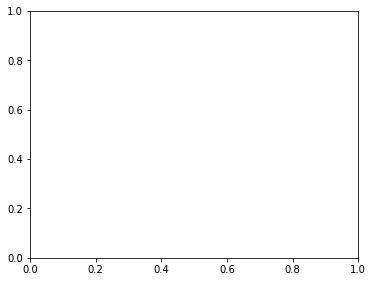

In [21]:
interact(plot_many_rasters,N=widgets.IntSlider(min=0,max=av_traces.shape[1],step=1,value=0))